In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import pandas as pd
import datetime as dt
import ipyvolume

In [3]:
rainarr = np.load('/home/joel/Monsoon/Code/3Drain_1deg.npy')    # 1901 - 2011 data
llone = np.load('/home/joel/Monsoon/Code/indialatlon.npy')
maplist = np.load('/home/joel/Monsoon/Data/MRF/maplist.npy')

syear = 1961-1901
eyear = 2011-1901
#eyear = 1996-1901
year = np.arange(syear,eyear)
sday = 151
eday = 273

ndays = eday - sday
nyears = eyear - syear

epsilon = 0.01

base = dt.date(1991,1,1) #Date in yyyy,mm,dd
date_list = [base + dt.timedelta(days=x) for x in range(365)]
month_list = np.array([i.month for i in date_list])
month_sdays = np.where(month_list[:-1] != month_list[1:])[0]
month_sdays += 1
month_sdays = np.insert(month_sdays,0,0)
month_sdays = np.append(month_sdays,365)


# mnum = [3,4,5,6,7,8]
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec',' ']



# data = rainarr.reshape((rainarr.shape[0],rainarr.shape[1]*rainarr.shape[2]), order = 'F')
# data_log = np.log(data.T+0.01)

data = rainarr.mean(axis=2)


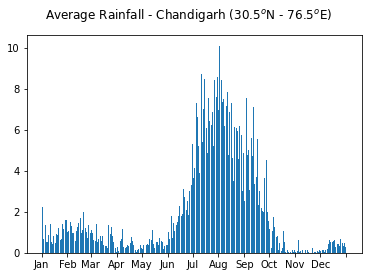

In [12]:
# 138 tvm
# 26 mum
# 158 del
# 224 chennai
# 311 - Kolkata
# 326 - Guwahati
# 132 - Chandigarh
loc = 132
locname = 'Chandigarh'
fig, ax = plt.subplots(1,1)
ax.bar(np.arange(1,data[loc,:].shape[0]+1),data[loc,:])
ax.set_xticks(month_sdays)
ax.set_xticklabels(months)
fig.suptitle(fr'Average Rainfall - {locname} ({llone[loc,0]}$^o$N - {llone[loc,1]}$^o$E)')
fig.savefig(f'/home/joel/Monsoon/Code/Report/Locations-Climatology/{loc}-{locname}.pdf')

In [43]:
import plotly.express as px
# df = px.data.tips()
a = np.random.randint(5, size=(30))[:,np.newaxis]
df = pd.DataFrame(data=np.hstack((a,np.random.rand(30,1))))
df.columns = ['index','vals']
fig = px.box(df, x="index", y="vals", points='all')
fig.show()

In [42]:
df.head()

,index,vals
0,4.0,0.108509
1,2.0,0.939647
2,3.0,0.108650
3,1.0,0.464927
4,0.0,0.543181


In [24]:
df = px.data.tips()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
